At first, we import the necessary libraries.
**It is important that you adjust the path you have installed tesseract to accordingly!**

In [1]:
import pytesseract
from PIL import Image

# Due to TesseractNotFoundError
# https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

Now comes the main method that takes a screenshot of ingredients as input and outputs a dictionary in the form of *{'product_name':['quantity','unit'], ...}*.

In [2]:
def createIngredientDict(image):
    """
    Outputs a dictionary in the form of {'product_name':['quantity','unit'], ...}
    Input: a screenshot of ingredients
    """
    ingredientList = createIngredientList(image)
    ingredientDict = {}
    
    for elem in ingredientList:
        quantity = isolateQuantity(elem)
        unit = isolateUnit(elem)
        productName = isolateProductName(ingredient=elem, quantity=quantity, unit=unit)
        ingredientDict[productName]=[quantity, unit]
    
    return ingredientDict

This method converts the image to text and then seperates the text row by row into a list.

In [9]:
def createIngredientList(imagePath):
    """
    Creates a list of ingredients from a screenshot
    """
    image = Image.open(imagePath)
    display(image)
    text = cleanUp(pytesseract.image_to_string(image)).lower()
    print(text)
    ingredients = text.splitlines()
    if '' in ingredients:
        ingredients.remove('')
    return ingredients

In [50]:
def cleanUp(text):
    """
    Function to counter common Tesseract mistakes
    """
    # Replacing '%' wit ',5' (e.g. in 1,5 Liter); fits most of the time
    text = text.replace('%',',5 ')
    text = text.replace("ii",'ü')
    text = text.replace('9', 'g')
    text = text.replace("grin", "grün")
    text = text.replace("krauter", "kräuter")
    text = text.replace("dol", "öl")
    text = text.replace('¥', '')
    return text


The next three methods filter the quantity, unit and the product name from a row of ingredients.

In [47]:
def isolateQuantity(ingredient):
    """
    Isolates the digits from the input String
    """
    set = '0123456789,'
    if "n.B." in ingredient:
        return "nach Belieben"
    text = ''.join([c for c in ingredient if c in set])
    if text.strip() == ",5":
        return "0,5"
    return text

In [36]:
def isolateUnit(ingredient):
    """
    Isolates the unit from the input String
    """
    ingredient = ingredient.lower()
    measurementUnitInt = ['gramm',' g ', 'dekagramm', 'dag', 'kilogramm', ' kg ', 'pfd', 'pfund', 'deciliter', 'dl ', 'centiliter', 'cl ', 'ml ', 'liter',
                       'esslöffel', 'el ', 'tl ', 'ssp.' 'tr', 'tropfen', 'sp', 'spritzer', 'schuss', 'messerspitze', 'msp', 'tasse', 'scheiben', 'scheibe(n)', 'scheibe', 'zehen', 'zehe',
                       'kleines', 'kleine' 'großes', 'große'
                       'etwas', 'prisen', 'prise(n)', 'prise',
                       'bund', 'bd ', 'dosen', 'dose(n)', 'dose', 'glas', 'gläser', 'packungen', 'packung', 'pck.', 'rollen', 'rolle(n)', 'rolle', 'würfel']
    
    measurementUnitUS = ['teaspoons','tablespoons','cups','containers','packets','bags','quarts','pounds','cans','bottles',
                          'pints','packages','ounces','jars','heads','gallons','drops','envelopes','bars','boxes','pinches',
                          'dashes','bunches','recipes','layers','slices','links','bulbs','stalks','squares','sprigs',
                          'fillets','pieces','legs','thighs','cubes','granules','strips','trays','leaves','loaves','halves']
    
    for elem in measurementUnitInt :
        if elem in ingredient:
            return elem.strip()
    
    for elem in measurementUnitUS:
        if elem in ingredient:
            return elem
        
    return ''

In [7]:
def isolateProductName(ingredient, quantity, unit):
    """
    Stripping the quantity and unit from the ingredient, leaving the product name
    """
    return ingredient.replace(str(quantity), '').replace(unit, '').strip()

Lastly, there is the call of the main function.

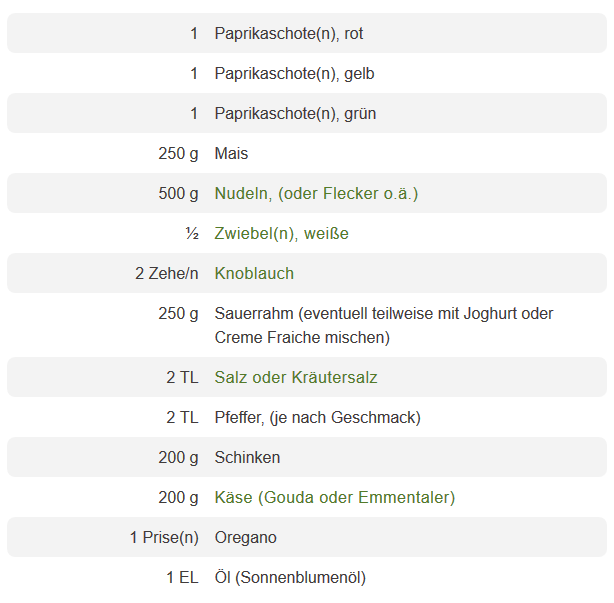

250g
500g

,5 
2zehein

250g

2tl
2tl
200g
200g

4 prise(n)

tel

paprikaschote(n), rot
paprikaschote(n), gelb
paprikaschote(n), grin

mais

nudein, (oder flecker 0.4.)
zwiebel(n), weibe
knoblauch

sauerrahm (eventuell teilweise mit joghurt oder
creme fraiche mischen)

salz oder krautersalz

pfeffer, (je nach geschmack)
schinken

kase (gouda oder emmentaler)
oregano

01 (sonnenblumendl)
{'g': ['200', ''], ',': ['5', ''], 'in': ['2', 'zehe'], '': ['', ''], 'tl': ['2', ''], 'prise(n)': ['4', ''], 'tel': ['', ''], 'paprikaschote(n), rot': ['', ''], 'paprikaschote(n), gelb': ['', ''], 'paprikaschote(n), grin': ['', ''], 'mais': ['', ''], 'nudein, (oder flecker 0.4.)': ['04', ''], 'zwiebel(n), weibe': ['', ''], 'knoblauch': ['', ''], 'sauerrahm (eventuell teilweise mit joghurt oder': ['', ''], 'creme fraiche mischen)': ['', ''], 'salz oder krautersalz': ['', ''], 'pfeffer, (je nach geschmack)': ['', ''], 'schinken': ['', ''], 'kase (gouda oder emmentaler)': ['', ''], 'oregano': ['', ''], '(

In [25]:
InDict = createIngredientDict(image="realbild1.png")
print(InDict)

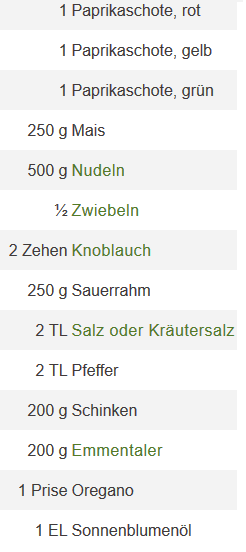

1 paprikaschote, rot
1 paprikaschote, gelb
1 paprikaschote, grün
250 g mais
500 g nudeln
,5 zwiebeln
2zehen knoblauch
250 g sauerrahm
2 tl salz oder krautersalz
2 tl pfeffer
200 g schinken
200 g emmentaler
1 prise oregano

1 el sonnenblumenöl
{'paprikaschote, rot': ['1', ''], 'paprikaschote, gelb': ['1', ''], 'paprikaschote, grün': ['1', ''], 'mais': ['250', 'g'], 'nudeln': ['500', 'g'], ', zwiebeln': ['5', ''], 'knoblauch': ['2', 'zehen'], 'sauerrahm': ['250', 'g'], 'salz oder krautersalz': ['2', 'tl'], 'pfeffer': ['2', 'tl'], 'schinken': ['200', 'g'], 'emmentaler': ['200', 'g'], 'oregano': ['1', 'prise'], 'sonnenblumenöl': ['1', 'el']}


In [42]:
InDict = createIngredientDict(image="realbild1.1.png")
print(InDict)

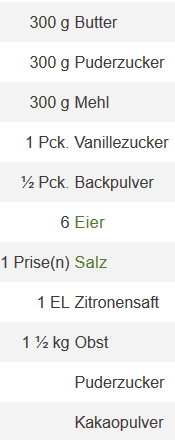

300 g butter
300 g puderzucker
300 g mehl
4 pck. vanillezucker

,5 pck. backpulver
6 eier
1 prise(n) salz
1 el zitronensaft
1 ,5 kg obst
puderzucker

kakaopulver
{'butter': ['300', 'g'], 'puderzucker': ['', ''], 'mehl': ['300', 'g'], 'vanillezucker': ['4', 'pck.'], ',5  backpulver': ['0,5', 'pck.'], 'eier': ['6', ''], 'salz': ['1', 'prise(n)'], 'zitronensaft': ['1', 'el'], '1 ,5  obst': ['1,5', 'kg'], '': ['', ''], 'kakaopulver': ['', '']}


In [51]:
InDict = createIngredientDict(image="realbild2.png")
print(InDict)